In [7]:
import pandas as pd

In [8]:
dataset = pd.read_csv("/home/unnimaya/Downloads/Iris.csv")

In [9]:
dataset.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
dataset.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [13]:
import seaborn as sns

In [14]:
import matplotlib.pyplot as plt

In [15]:
# set the background colour of the plot to white
sns.set(style="whitegrid", color_codes=True)
# setting the plot size for all plots
sns.set(rc={'figure.figsize':(11.7,8.27)})

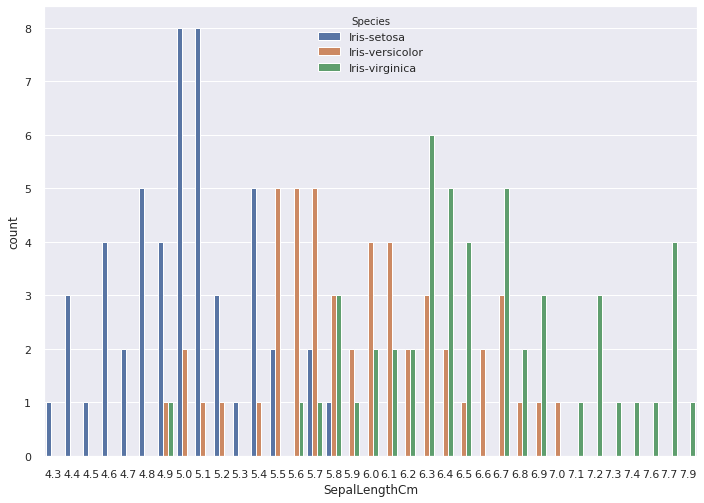

In [16]:
sns.countplot(x ="SepalLengthCm",data = dataset,hue = "Species")

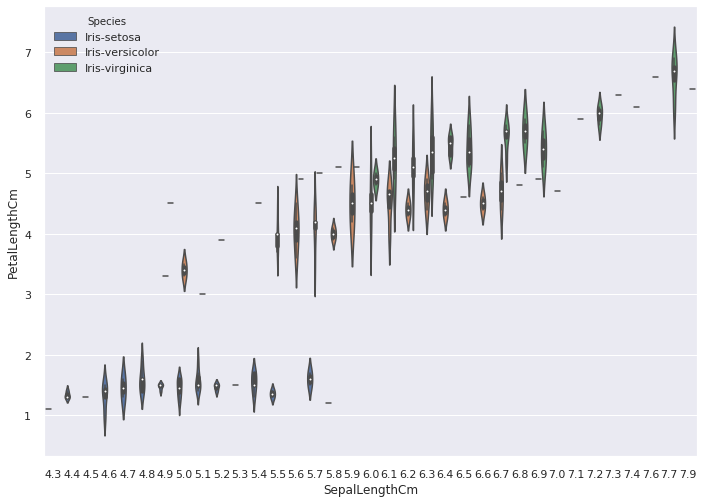

In [17]:
sns.violinplot(x = "SepalLengthCm", y = "PetalLengthCm", hue = "Species",data = dataset)

In [18]:
from sklearn import preprocessing

In [19]:
le = preprocessing.LabelEncoder()

In [20]:
encoded_value = le.fit_transform(["iris-setosa","iris-versicolor","iris-virginica"])

In [21]:
print(encoded_value)

[0 1 2]


In [22]:
dataset['Species'] = le.fit_transform(dataset['Species'])

In [23]:
dataset.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0


In [24]:
data = dataset[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

In [25]:
data.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [26]:
target = dataset['Species']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=.4)

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [30]:
gnb = GaussianNB()

In [31]:
pred = gnb.fit(x_train,y_train)

In [32]:
y_predict=gnb.predict(x_test)

In [33]:
acc= accuracy_score(y_predict,y_test)

In [34]:
acc

0.95

In [35]:
from sklearn.svm import LinearSVC

In [36]:
svc_model = LinearSVC(random_state = 0)

In [37]:
pred = svc_model.fit(x_train,y_train).predict(x_test)

/home/unnimaya/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [38]:
print("LinearSVC accuracy : ",accuracy_score(y_test,pred,normalize = True))

LinearSVC accuracy :  0.85


In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
neigh = KNeighborsClassifier(n_neighbors = 3)

In [41]:
neigh.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [42]:
pred = neigh.predict(x_test)

In [43]:
accuracy = accuracy_score(y_test,pred)
accuracy

0.8833333333333333

In [44]:
from yellowbrick.classifier import ClassificationReport

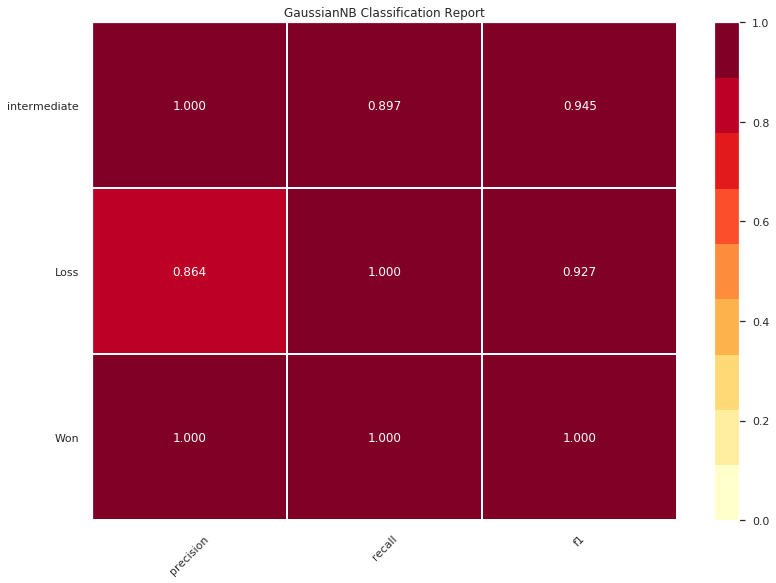

In [50]:
visualizer = ClassificationReport(gnb,classes=["Won","Loss","intermediate"])
visualizer.fit(x_train,y_train)
visualizer.score(x_test,y_test)
g = visualizer.show()

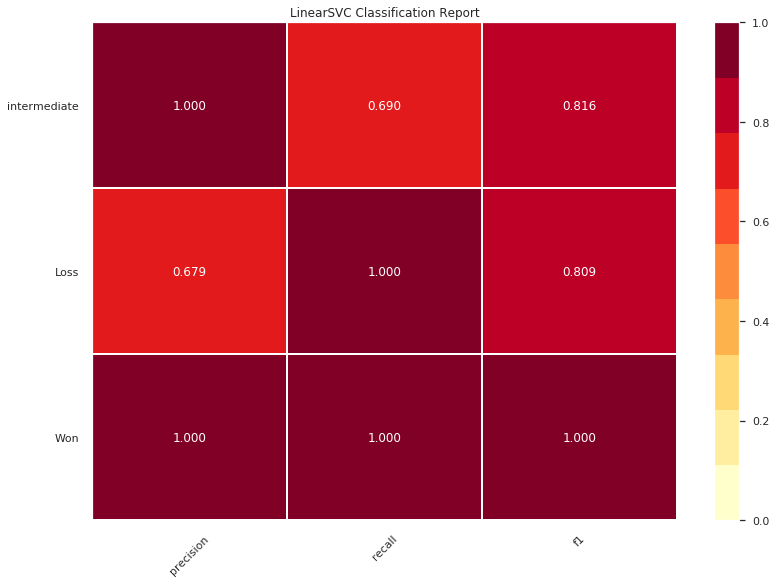

In [52]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(svc_model, classes=['Won','Loss',"intermediate"])
visualizer.fit(x_train, y_train) # Fit the training data to the visualizer
visualizer.score(x_test, y_test) # Evaluate the model on the test data
g = visualizer.show() # Draw/show/poof the data

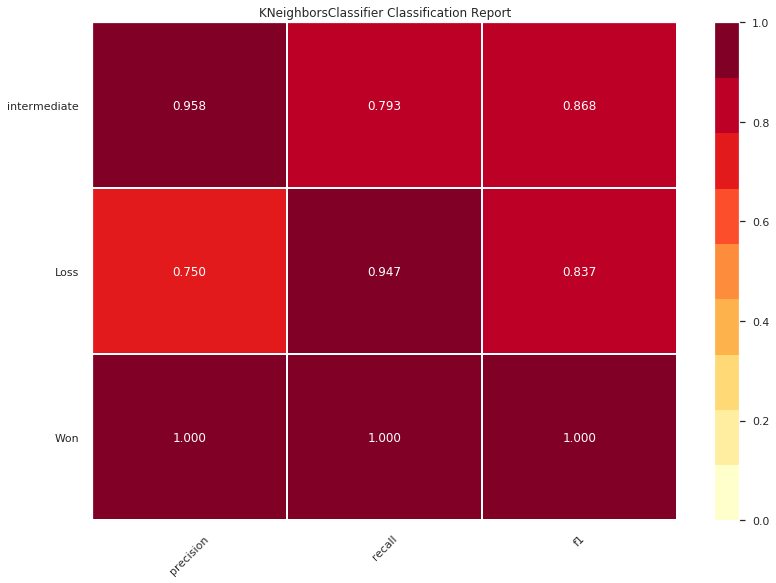

In [54]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(neigh, classes=['Won','Loss','intermediate'])
visualizer.fit(x_train, y_train) # Fit the training data to the visualizer
visualizer.score(x_test, y_test) # Evaluate the model on the test data
g = visualizer.show() # Draw/show/poof the data